### Linear Regression with ScikitLearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
medical_df = pd.read_csv("medical_data.csv")
medical_df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1064,29,female,25.600,4,no,southwest,5708.86700
66,61,female,39.100,2,no,southwest,14235.07200
108,29,male,27.940,0,no,southeast,2867.11960
742,53,male,34.105,0,yes,northeast,43254.41795
1043,28,female,25.800,0,no,southwest,3161.45400
155,44,male,39.520,0,no,northwest,6948.70080
707,49,male,28.690,3,no,northwest,10264.44210
146,46,male,30.495,3,yes,northwest,40720.55105
205,28,female,28.880,1,no,northeast,4337.73520
1045,43,female,24.700,2,yes,northwest,21880.82000


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


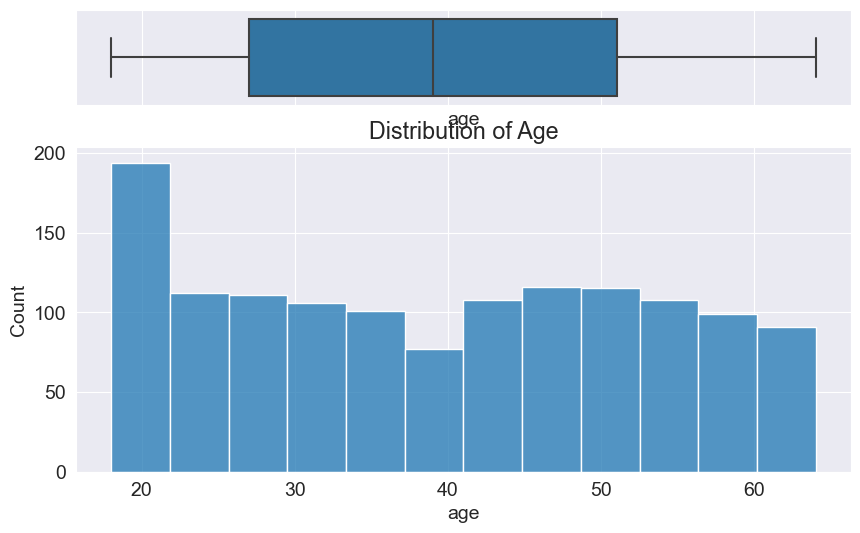

In [6]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios': (.25, .85)})


sns.boxplot(x="age", data=medical_df, ax=ax1)

sns.histplot(x='age', data=medical_df, ax=ax2) 
plt.title("Distribution of Age")
plt.show()

## Body mass Index

ValueError: Invalid RGBA argument: 'ch:start=.2, rot=-.3'

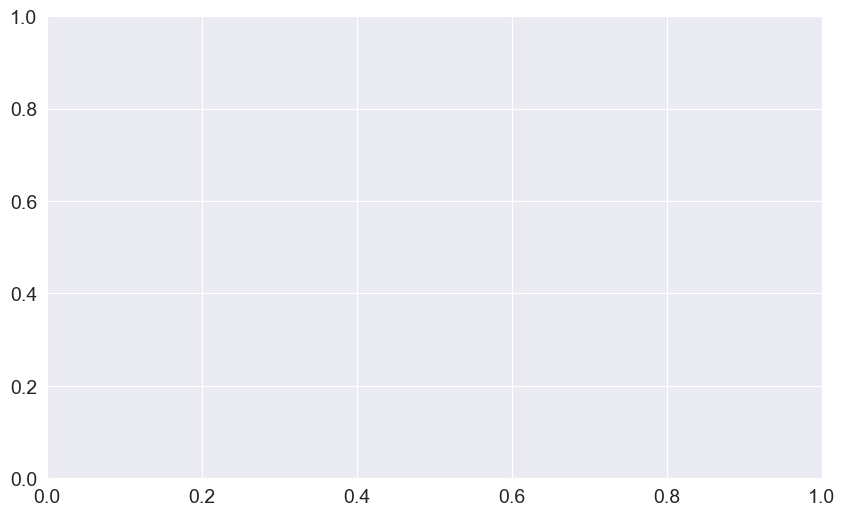

In [13]:
sns.histplot(medical_df, x='bmi', kde=True, color='ch:start=.2, rot=-.3')
## Its having a normal distribution

## Charges

Text(0.5, 1.0, 'Histogram of charges based on their smoking status')

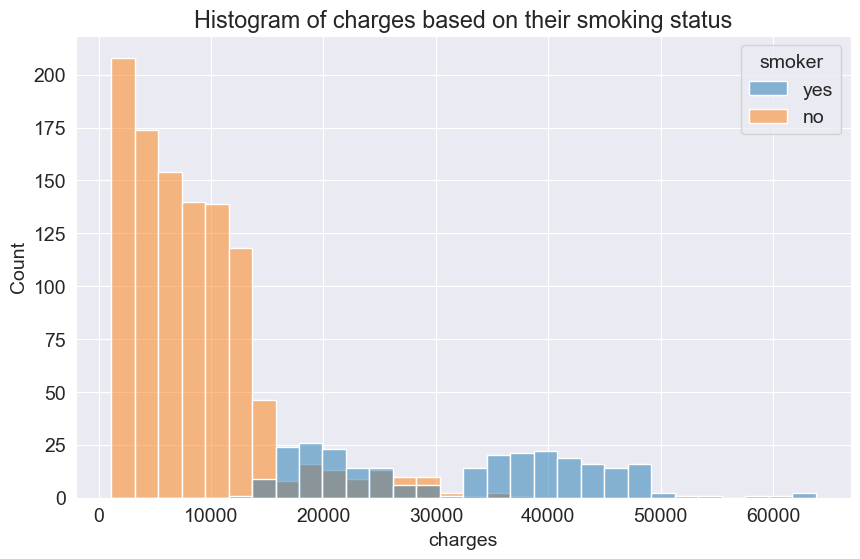

In [8]:
sns.histplot(medical_df, x='charges', hue='smoker')
plt.title("Histogram of charges based on their smoking status")

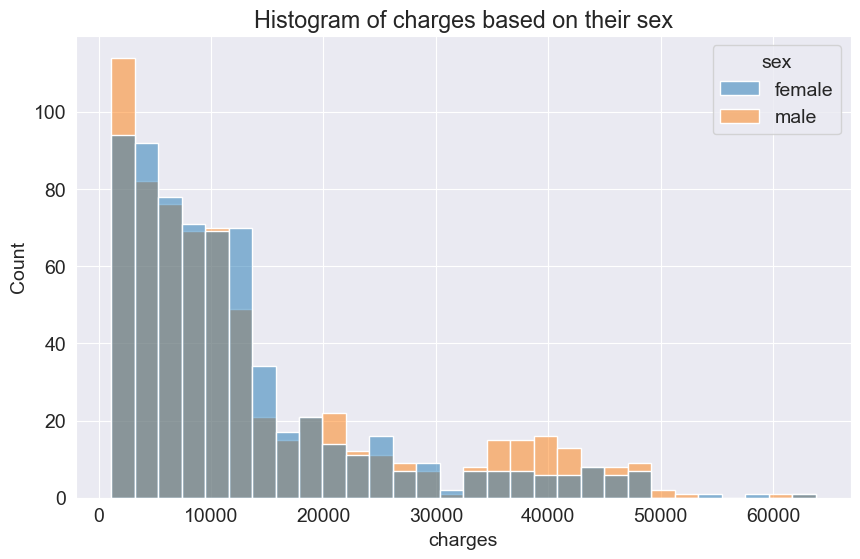

In [9]:
sns.histplot(medical_df, x='charges', hue='sex')
plt.title("Histogram of charges based on their sex");

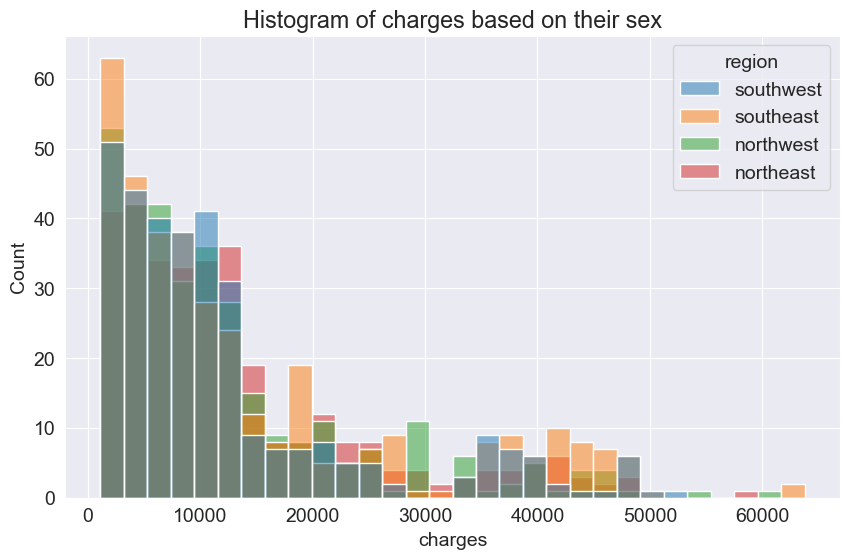

In [10]:
sns.histplot(medical_df, x='charges', hue='region')
plt.title("Histogram of charges based on their sex");

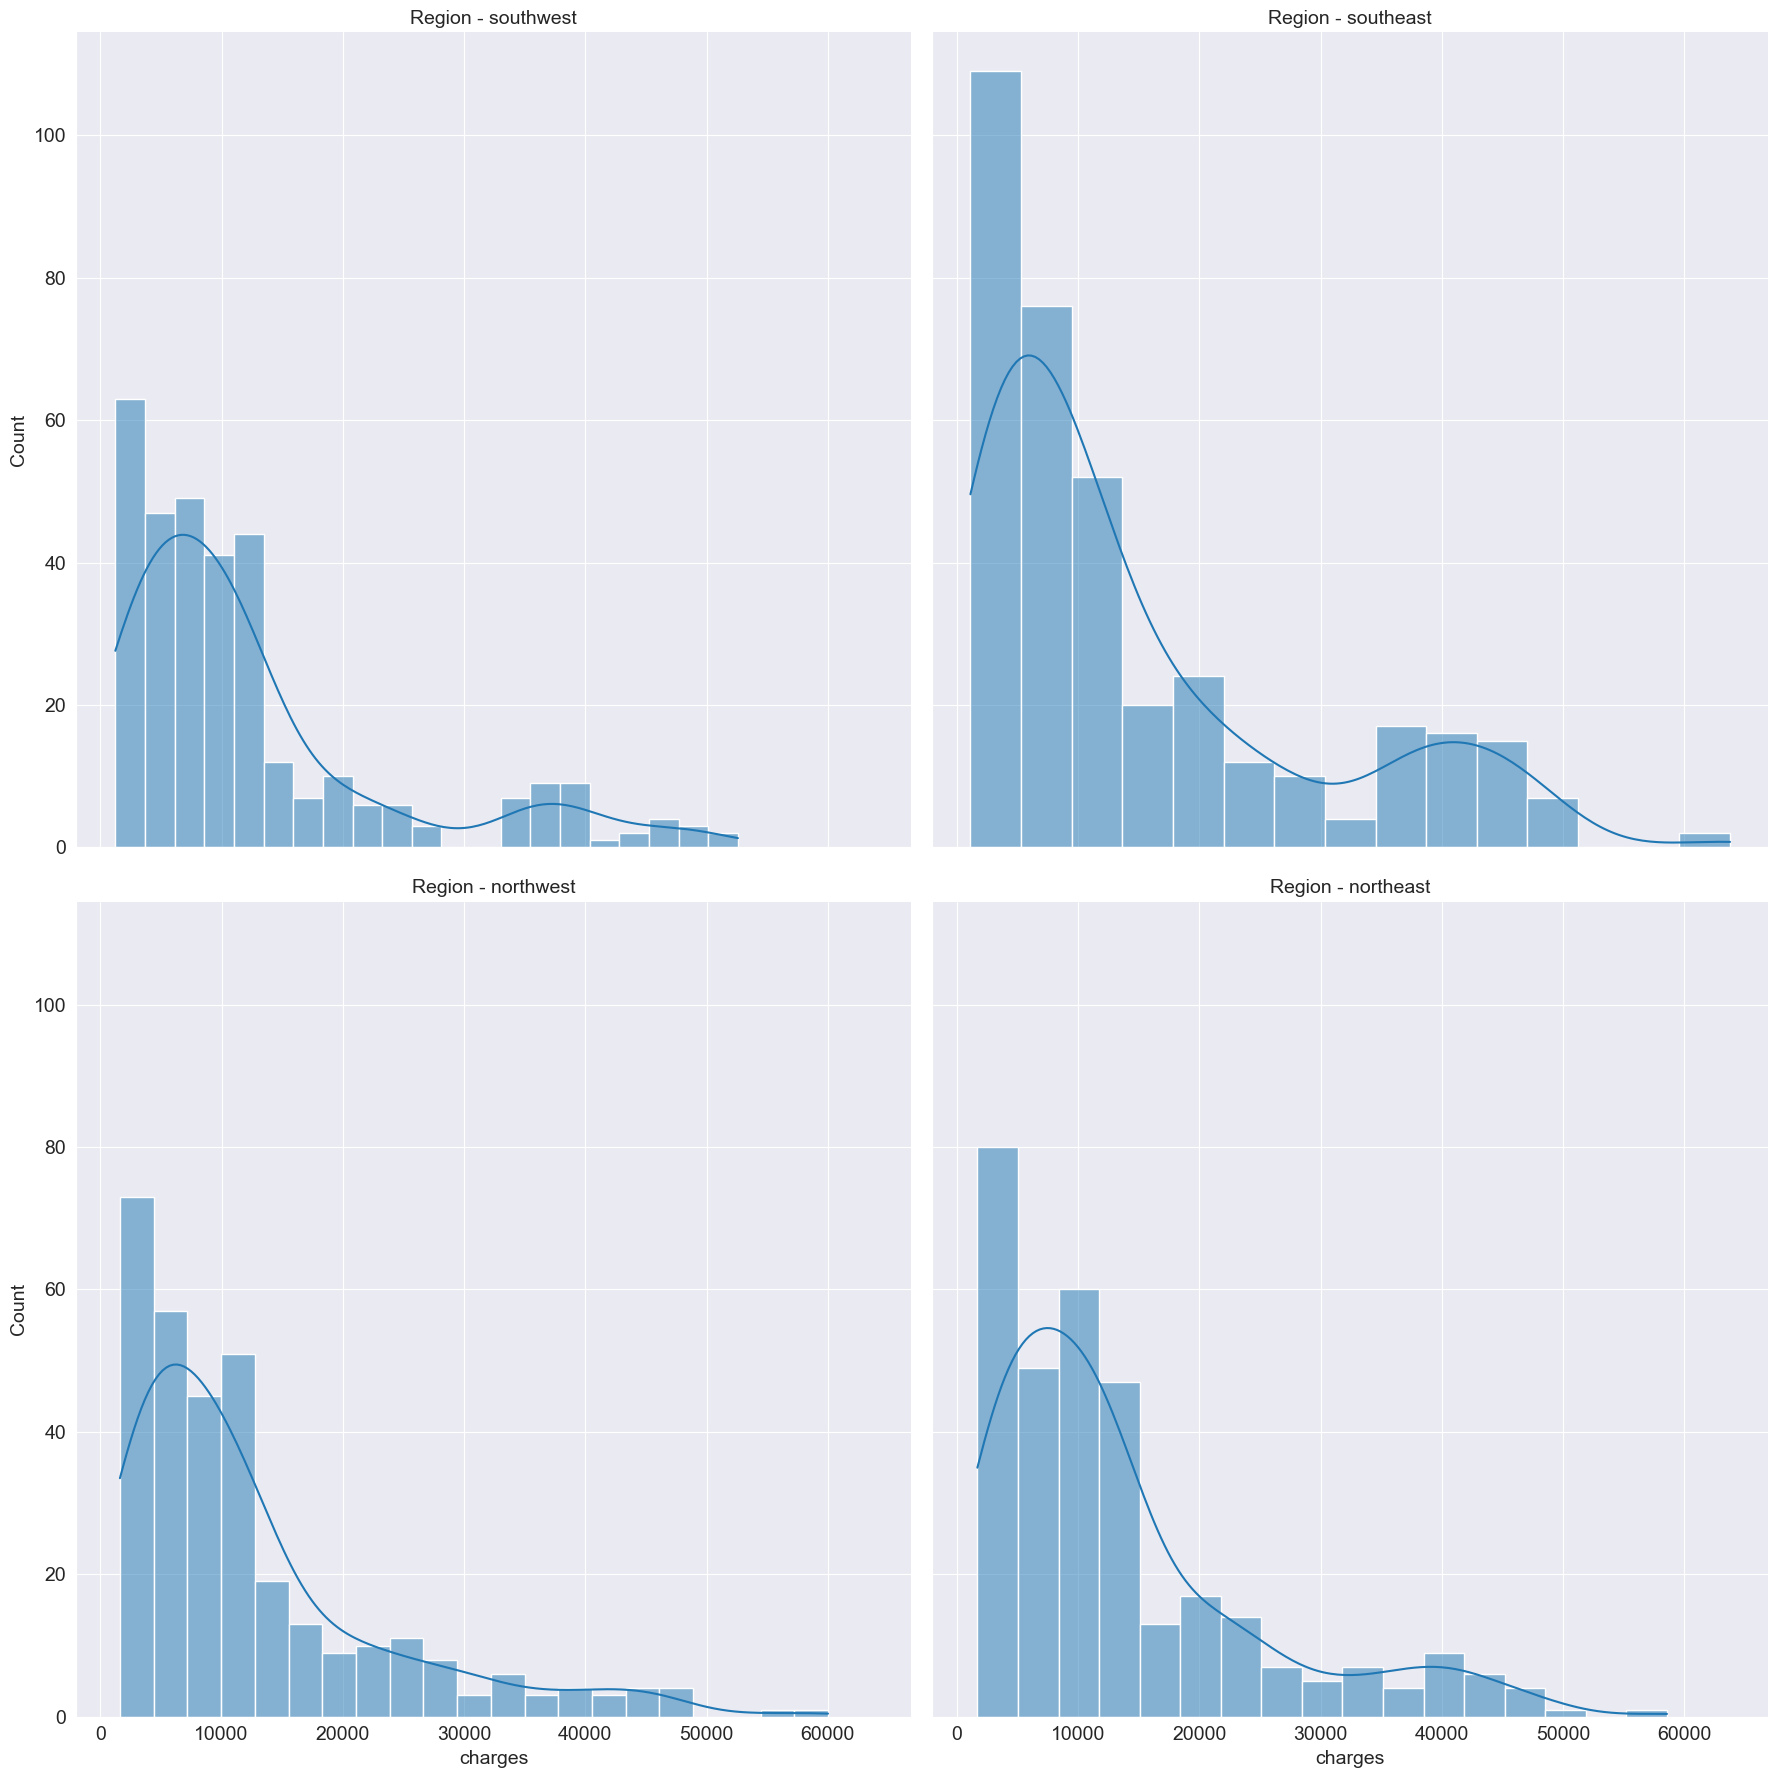

In [11]:
g = sns.FacetGrid(medical_df, col='region', col_wrap=2, height=9)


g.map(sns.histplot, 'charges', kde=True)

# Set titles for each subplot
g.set_titles("Region - {col_name}", fontsize=20)

plt.show()

## Age and Charges

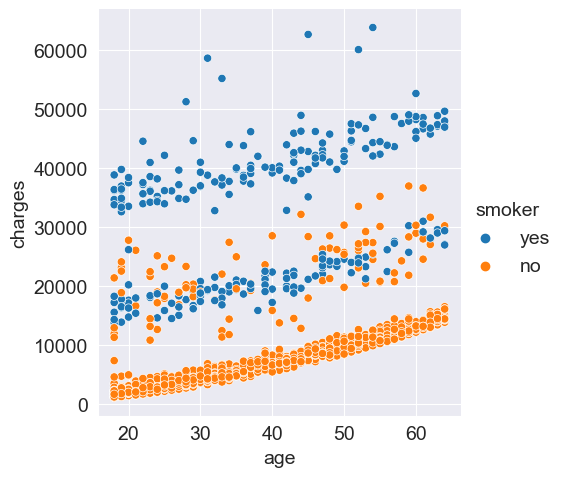

In [12]:
sns.relplot(x='age', y='charges', data=medical_df, hue='smoker')

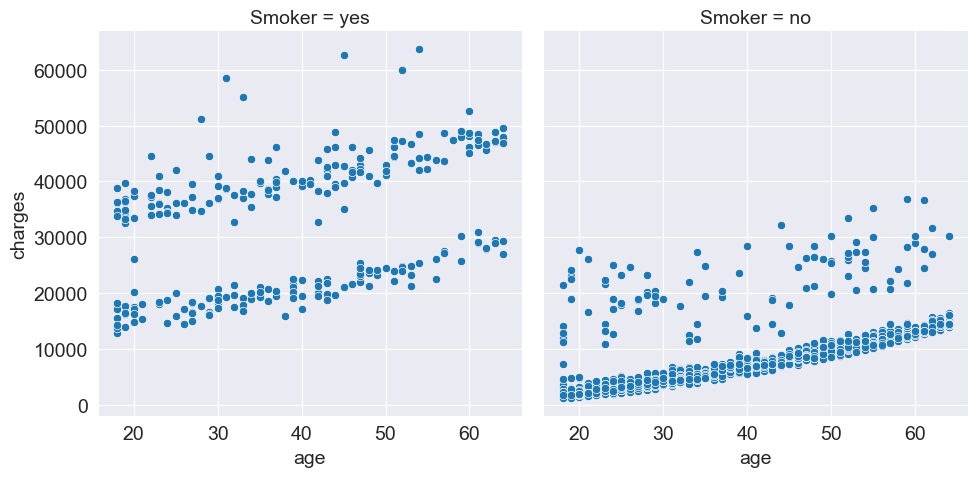

In [13]:
a = sns.relplot(x='age', y='charges', data=medical_df, col='smoker')
a.set_titles("Smoker = {col_name}", fontsize=30)

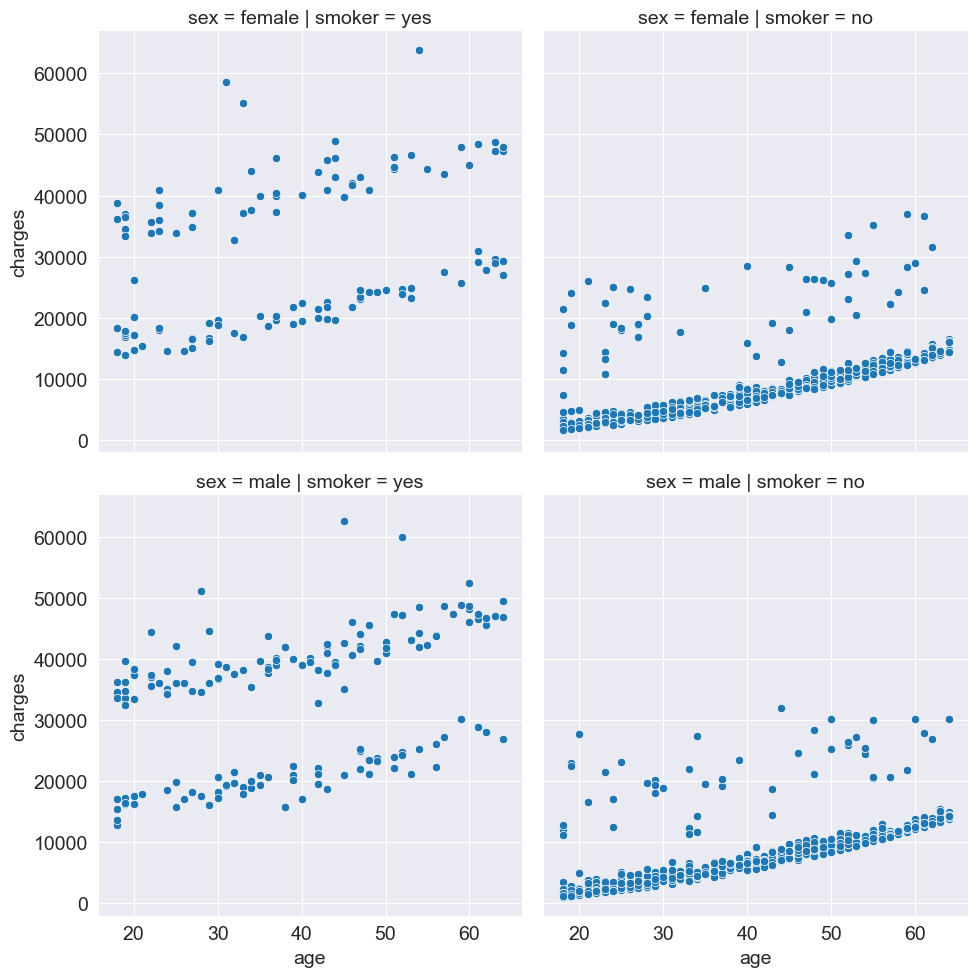

In [14]:
a = sns.relplot(x='age', y='charges', data=medical_df, row='sex', col='smoker')

### BMI and charges

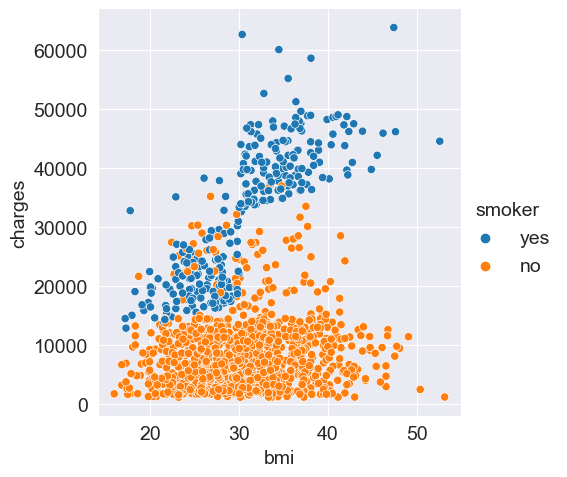

In [15]:
sns.relplot(x='bmi', y='charges', hue='smoker', data=medical_df)

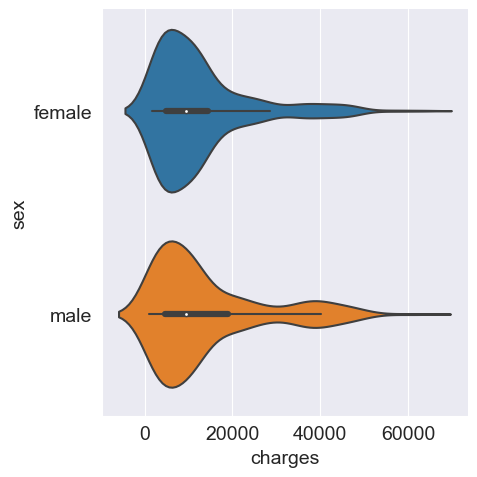

In [16]:
sns.catplot(x='charges', y='sex', kind='violin', data=medical_df)

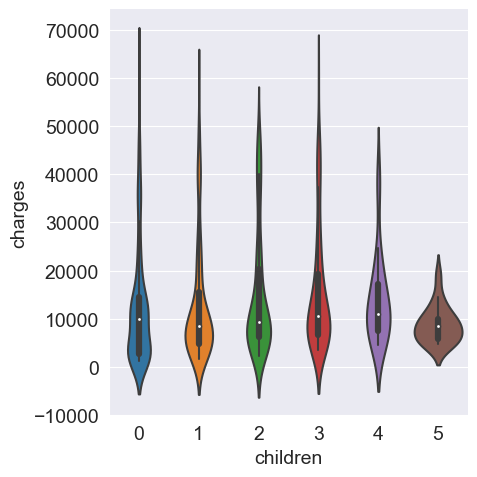

In [17]:
sns.catplot(y='charges', x='children', kind='violin', data=medical_df)

## Correlation
- Extreme values of -1 and 1 indicate a perfectly linear relationship
- A coefficient of zero represents no linear relationship
- Values in between 0 and +1/-1 indicate theres a relationship but the points don't all fall on a line. As  approaches -1 or 1 he strength of a relatipnship increases and he data points tend to fall closer to a line
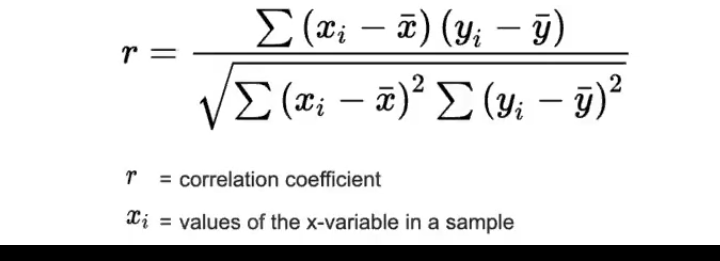

In [18]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [19]:
medical_df.charges.corr(medical_df.bmi)

0.1983409688336288

In [20]:
medical_df.corr()

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_17896\4290363667.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  medical_df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [21]:
smoker_values = {"no": 0, "yes": 1}
smoker_numeric = medical_df.smoker.map(smoker_values)

In [22]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984785

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_17896\598591072.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)


Text(0.5, 1.0, 'Correlation matix')

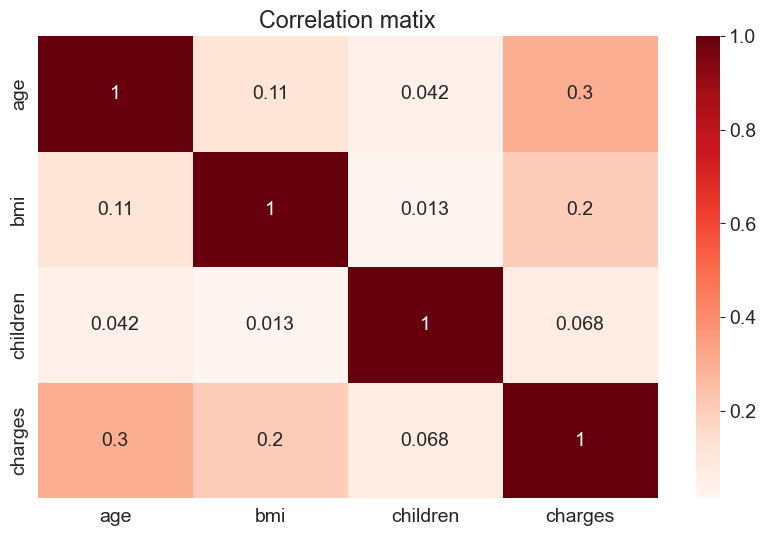

In [23]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title("Correlation matix")

### Correlation Vs causation fallacy

#### Note that high correlation can not be used to interprete a cause-effect relation between features. Two features X and Y can be correlated if X causes Y or if Y causes X, or if both caused independently by some other factor X, and the correlation will no longer hold true if one of the cause effect relationships is broken. Its also possible that X and Y simply appear to be correlated because the sample is too small.

#### While this may seem obvious, computers can differentiate between correlation and causation, and decisions based on automated system can often have major consequencies on societ, so its important to study why automated systems lead to a given result. Determining cause-effect relationships require human insights

## Linear Regression using a single feature
Since smoker and age have the strongest correlation with charges. Lets find a way to estimating the values of charges using the value of age for non-smokers.

In [24]:
non_smoker_df = medical_df[medical_df['smoker']== 'no']

<Axes: title={'center': 'AGE VS CHARGES'}, xlabel='age', ylabel='charges'>

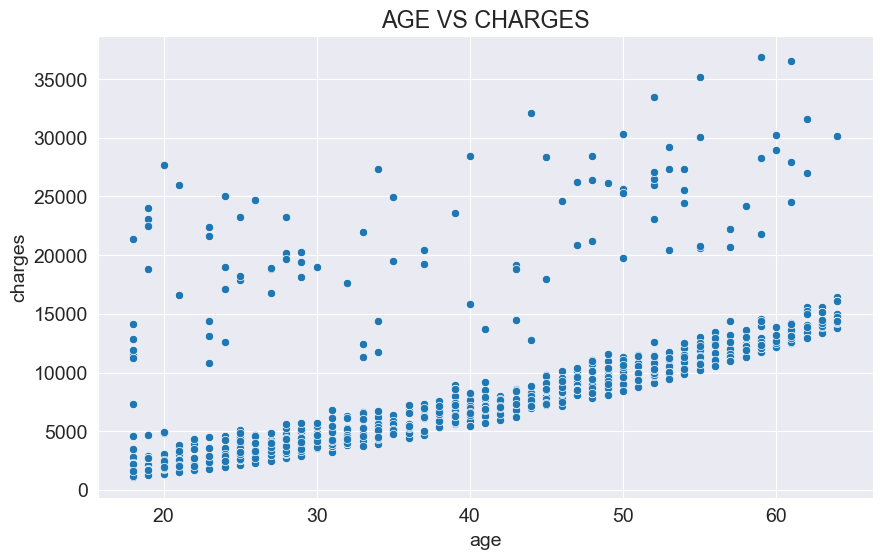

In [25]:
plt.title("AGE VS CHARGES")
sns.scatterplot(non_smoker_df, x='age', y='charges')

$ y = ax + b $

$ b $ is the intercept, $ a $ is the slope and $ x $ is the independent 

Example: $ charges = a * age + b $

In [26]:
def estimate_charges(age, a, b):
    return (a * age) + b

In [27]:
estimate_charges(30, 100, 270)

3270

In [28]:
ages = non_smoker_df.age

In [29]:
display(estimate_charges(ages, 100, -39.2019))

1       1760.7981
2       2760.7981
3       3260.7981
4       3160.7981
5       3060.7981
          ...    
1332    5160.7981
1333    4960.7981
1334    1760.7981
1335    1760.7981
1336    2060.7981
Name: age, Length: 1064, dtype: float64

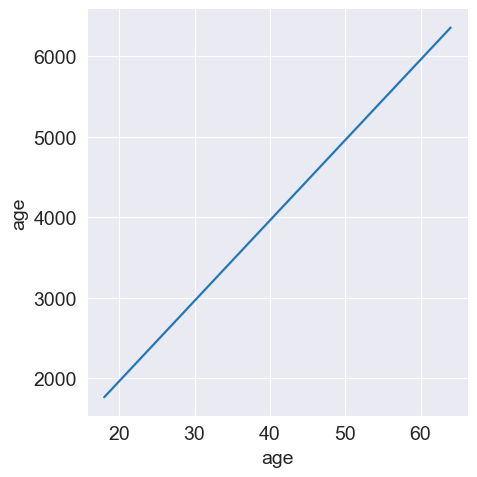

In [30]:
estimated_charges = estimate_charges(ages, 100, -39.2019)
sns.relplot(x=ages, y=estimated_charges, kind='line')

<Axes: xlabel='age', ylabel='charges'>

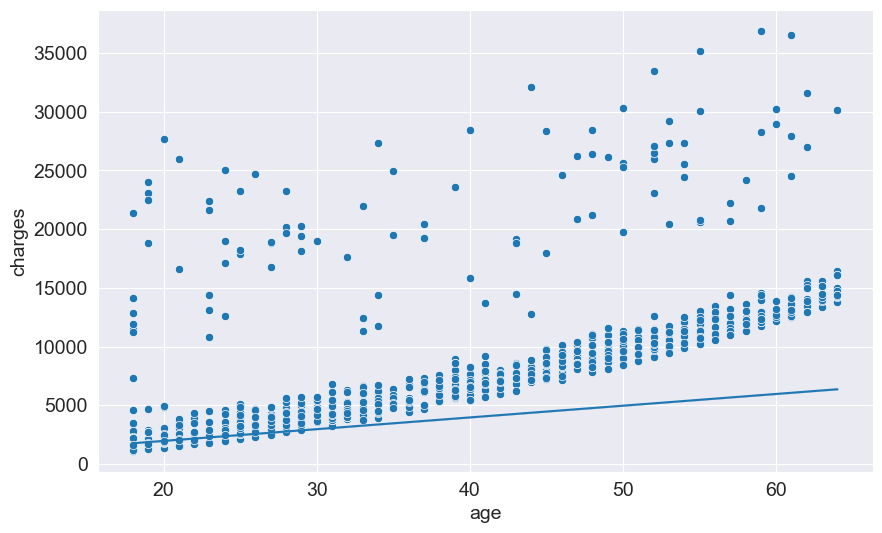

In [31]:
sns.scatterplot(x='age', y='charges', data=non_smoker_df)
sns.lineplot(x=ages, y=estimated_charges)

<Axes: xlabel='age', ylabel='charges'>

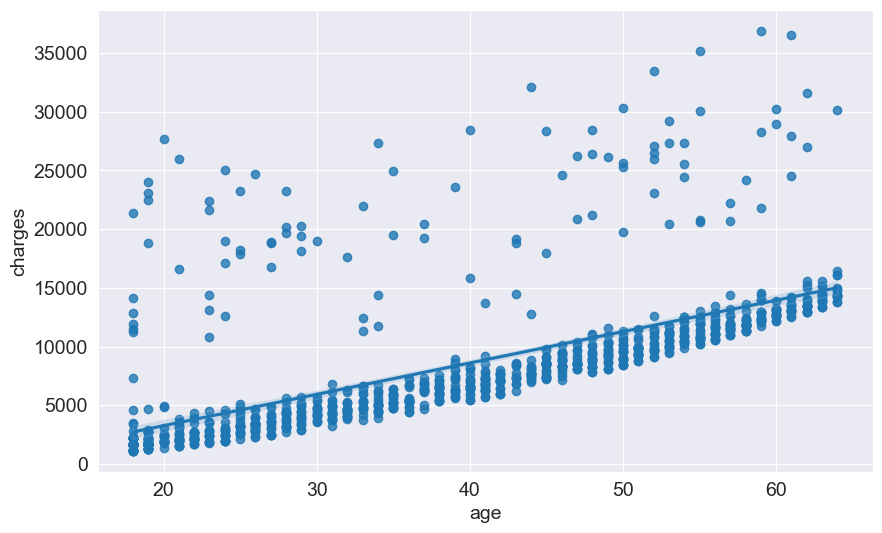

In [32]:
sns.regplot(x='age', y='charges', data=non_smoker_df)

In [33]:
def try_parameters(a, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages, a, b)
    
    sns.scatterplot(x=ages, y=target, label="Actual values")
    sns.lineplot(x=ages, y=estimated_charges, label="Predicted values", color='red')
    plt.legend()
    return estimated_charges

1       1744.6
2       3152.6
3       3856.6
4       3715.8
5       3575.0
         ...  
1332    6531.8
1333    6250.2
1334    1744.6
1335    1744.6
1336    2167.0
Name: age, Length: 1064, dtype: float64

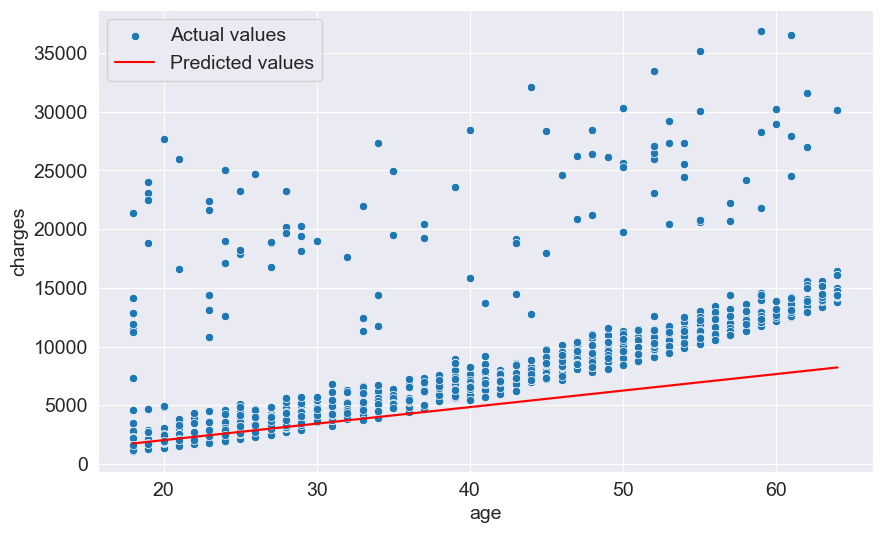

In [34]:
try_parameters(140.8, -789.8)

## Loss/Cost Function
- Calculate the difference between the predicted and the actual
- Sum them up and square the reuslt then divide by the number of items i.e. the average
- Take the square root of the result
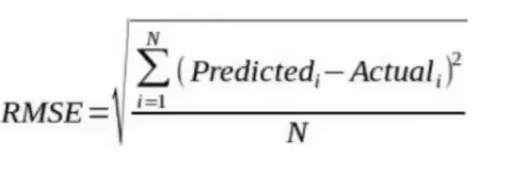

In [35]:
def rmse(targets, predicted):
    return np.sqrt(np.mean(np.square(predicted-targets)))

6199.962315872998

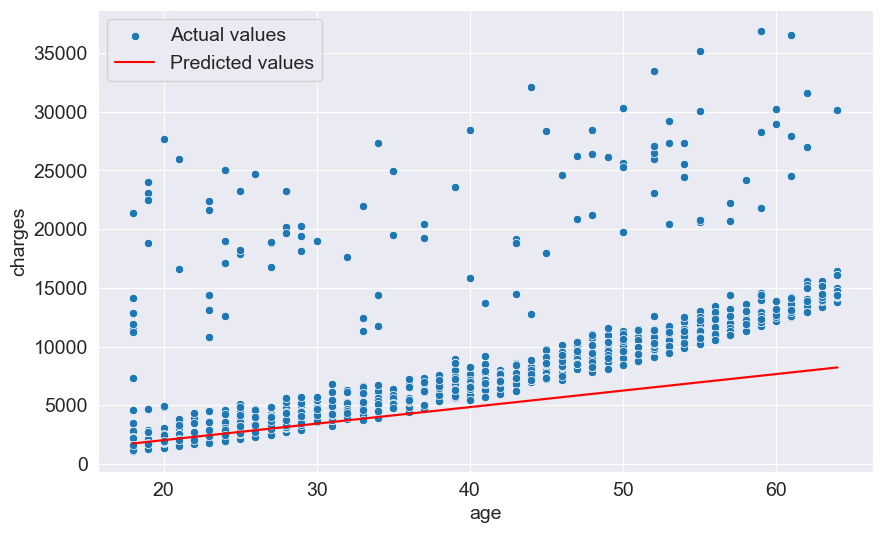

In [36]:
rmse(non_smoker_df.charges, try_parameters(140.8, -789.8))

In [37]:
def try_parameters(a, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages, a, b)
    
    sns.scatterplot(x=ages, y=target, label="Actual values")
    sns.lineplot(x=ages, y=estimated_charges, label="Predicted values", color='red')
    plt.legend()
    print("RMSE LOSS: {}".format(rmse(target, estimated_charges)))

RMSE LOSS: 4703.997743868681


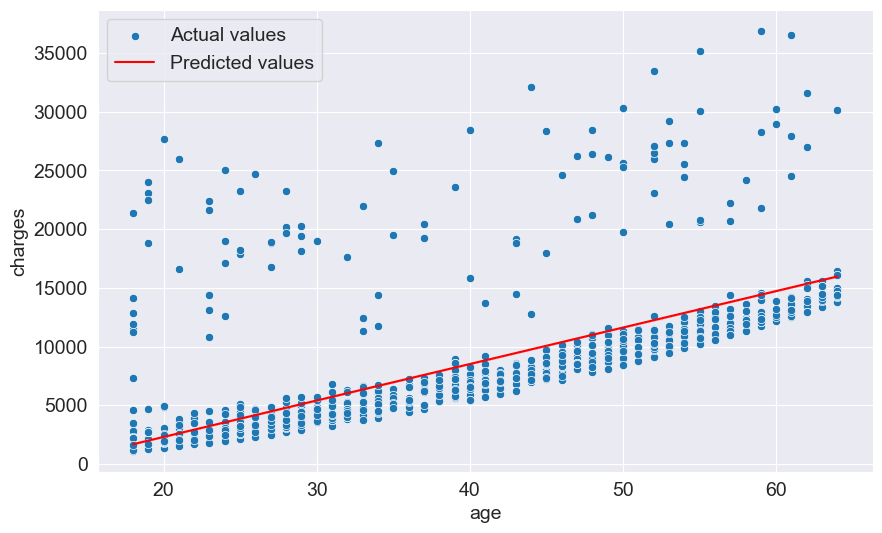

In [38]:
try_parameters(310.8, -3919.8)

## Optimizer
- Ordinary Least squares: Better for smaller datasets
- Stochastic graident descents: Better for larger datasets

 # Linear Regression using Scikit-learn

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()

In [41]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [42]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']
inputs.shape, targets.shape

((1064, 1), (1064,))

In [43]:
model.fit(inputs, targets)

LinearRegression()

In [44]:
model.predict(np.array([[23], [35], [67]]))

C:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7262.29139253, 15814.25660313])

In [45]:
predictions = model.predict(inputs)

In [46]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [47]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [48]:
model.coef_, model.intercept_

(array([267.24891283]), -2091.4205565650827)

RMSE LOSS: 4662.505766636395


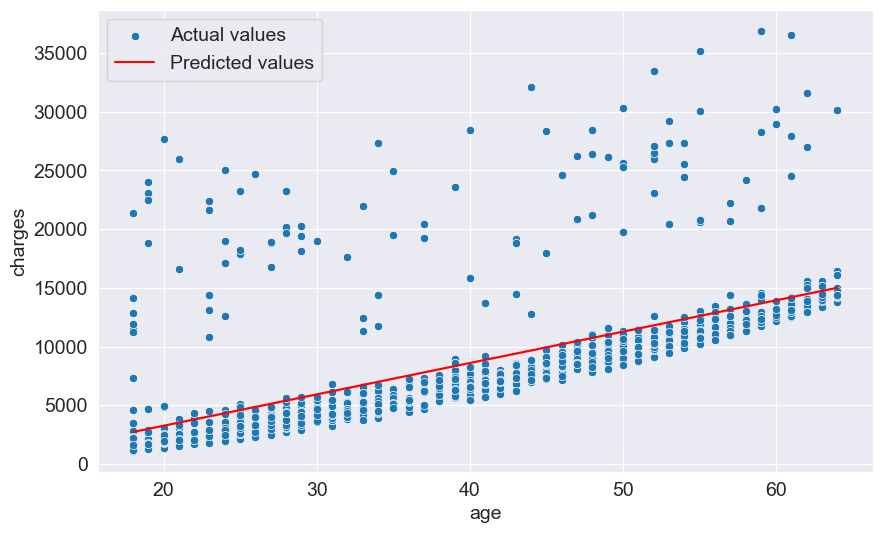

In [49]:
try_parameters(model.coef_, model.intercept_)

### USING SGDRegressror

In [50]:
from sklearn.linear_model import SGDRegressor

In [51]:
modelSGD = SGDRegressor()

In [52]:
modelSGD.fit(inputs, targets)

SGDRegressor()

In [53]:
modelSGD.coef_, modelSGD.intercept_

(array([172.735098]), array([471.24422249]))

RMSE LOSS: 4985.396869449174


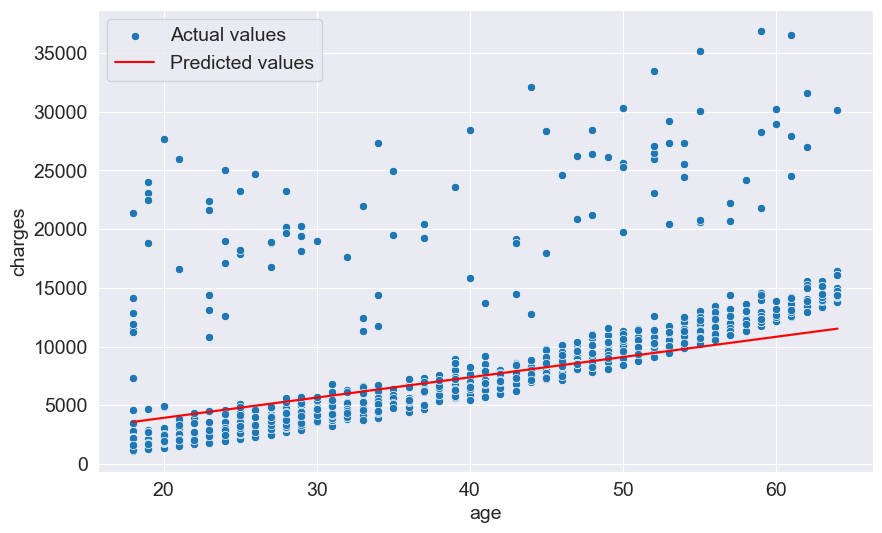

In [54]:
try_parameters(modelSGD.coef_, modelSGD.intercept_)

Every machine learning has 3 components
Machine learning is the process of computing the best parameters to model relationship between some features and targets
1. Model
2. Cost Function
3. Optimizer
![Screenshot%20%281280%29.png](attachment:Screenshot%20%281280%29.png)


### Linear regression with multiple features
$ charges = a1 * age + a2 * bmi + b $

In [55]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df.charges

In [56]:
model = LinearRegression().fit(inputs, targets)

In [57]:
predictions = model.predict(inputs)

In [58]:
rmse(targets, predictions)

4662.3128354612945

In [59]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833271

$ charges = a1 * age + a2 * bmi + a3 * children + b $

In [60]:
non_smoker_df['children'].unique()

array([1, 3, 0, 2, 5, 4], dtype=int64)

In [61]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542186

Text(0.5, 1.0, 'Strip plot (Charges vs Children)')

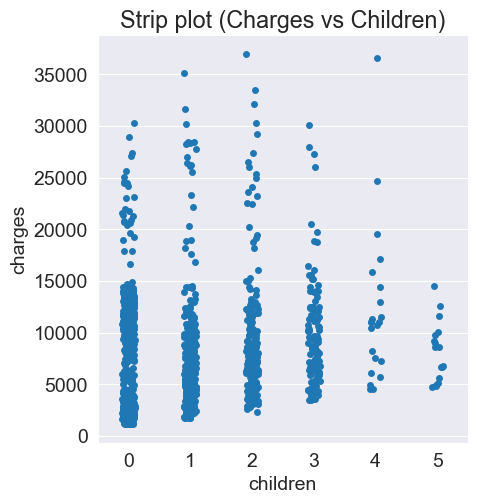

In [66]:
sns.catplot(y='charges', x='children', kind='strip', data=non_smoker_df)
plt.title("Strip plot (Charges vs Children)")

In [70]:
inputs = non_smoker_df[['age', 'bmi', 'children']]
model = LinearRegression().fit(inputs, targets)

In [72]:
predictions = model.predict(inputs)

rmse(targets, predictions)

### USING ENTIRE DATASET INSTEAD

In [74]:
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)

In [76]:
predictions = model.predict(inputs)
rmse(targets, predictions)

11355.317901125973

### USING CATEGORICAL FEATURES FOR MACHINE LEARNING
- If a categorical column has just two categories (it's called binary category), then we can replace the values with 0 and 1
- If a catgeorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s 
- If the categories have a natural order (e.g cold, natural, warm, hot) then they can be converted to numbers (e.g 1,2,3,4) preserving the order. These are called ordinals

## Binary categories
The smoker has just two values "yes" and "no"

<Axes: xlabel='smoker', ylabel='charges'>

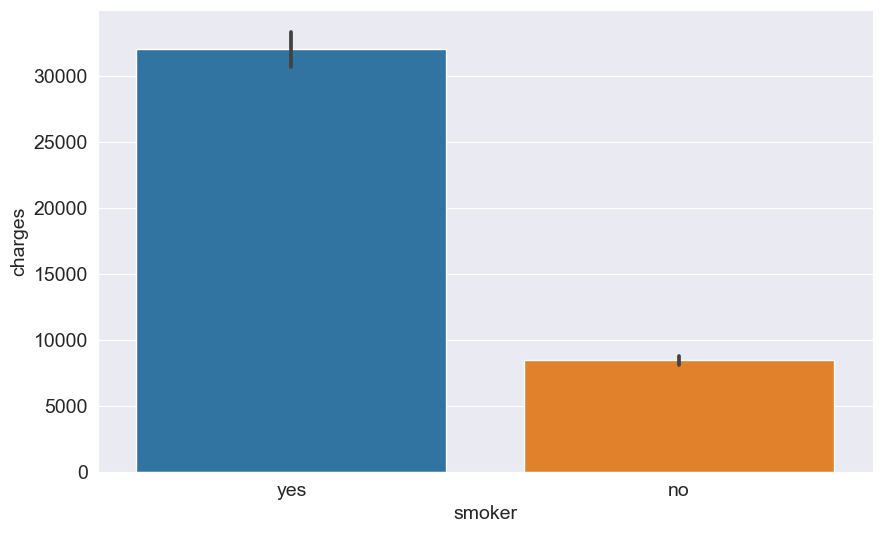

In [78]:
sns.barplot(medical_df, x='smoker', y="charges")

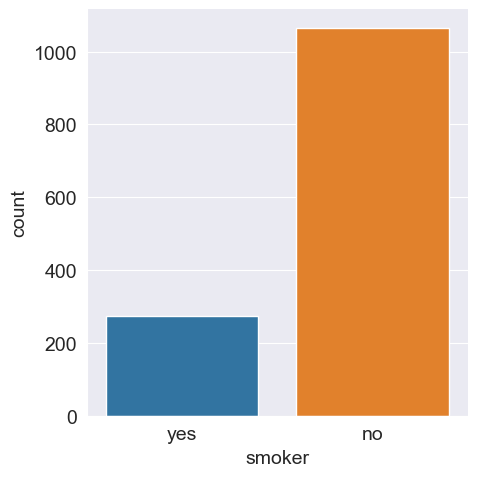

In [80]:
sns.catplot(medical_df, x='smoker', kind='count')

In [83]:
smoker_values

{'no': 0, 'yes': 1}

In [86]:
smoker_code = medical_df.smoker.map(smoker_values)

In [87]:
medical_df.charges.corr(smoker_code)

0.7872514304984785

In [88]:
medical_df['smoker_code'] = smoker_code

In [91]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)

In [92]:
predictions = model.predict(inputs)

In [93]:
rmse(targets, predictions)

# It went from 11350 to 6056 almost by 50%

6056.439217188081

<Axes: xlabel='sex', ylabel='charges'>

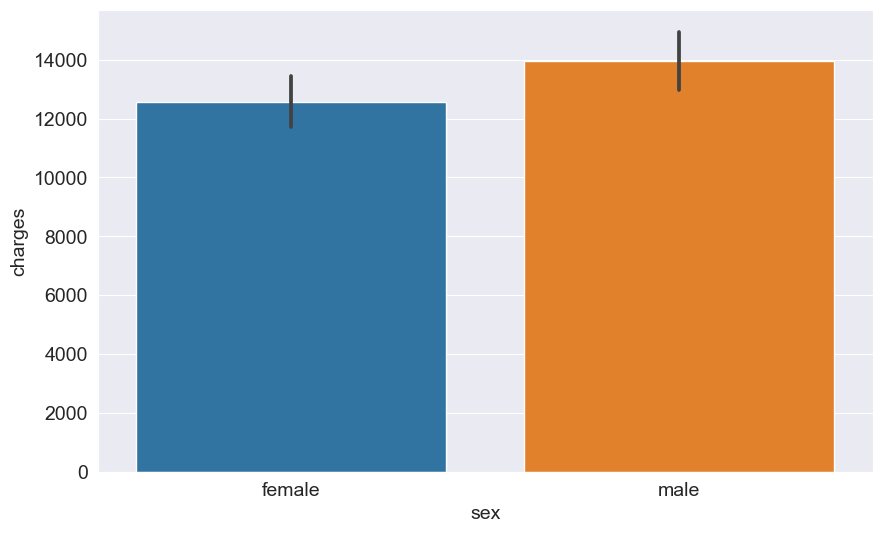

In [94]:
sns.barplot(x='sex', y='charges', data=medical_df)

In [96]:
sex_values = {"male": 1, "female": 0}
medical_df["sex_code"] = medical_df.sex.map(sex_values)

In [98]:
medical_df.charges.corr(medical_df.sex_code)

0.05729206220202527

In [99]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)

In [100]:
predictions = model.predict(inputs)

In [101]:
rmse(targets, predictions)

6056.100708754546

<Axes: xlabel='region', ylabel='charges'>

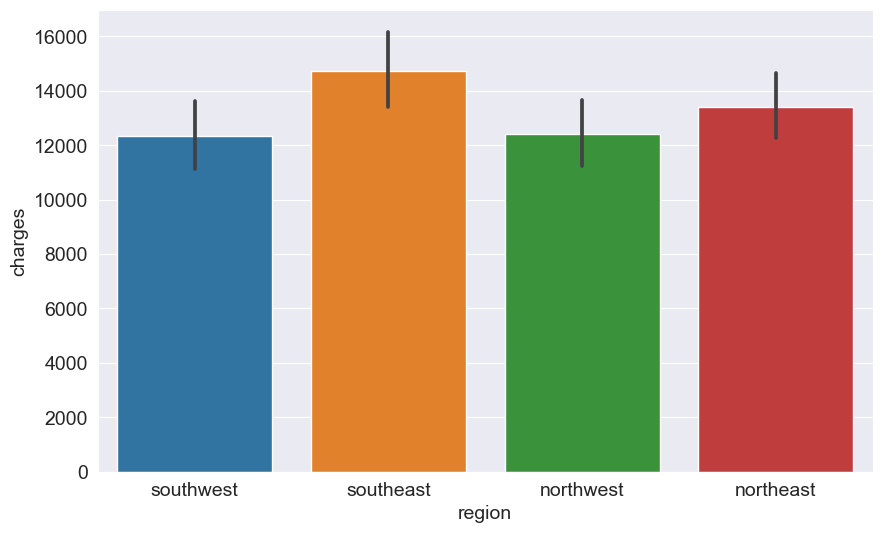

In [102]:
sns.barplot(x='region', y='charges', data=medical_df)

In [215]:
from sklearn import preprocessing

In [216]:
encoder = preprocessing.OneHotEncoder()

In [217]:
encoder.fit(medical_df[['region']])

OneHotEncoder()

In [218]:
encoder.categories_[0]

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [219]:
encoder.transform([['northeast']]).toarray()

C:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0., 0.]])

In [220]:
one_hot = encoder.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [221]:
medical_df[encoder.categories_[0]] = one_hot 

In [222]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [223]:
values = ['age', 'bmi', 'children', 'smoker_code', 'sex_code'] + encoder.categories_[0].tolist()
inputs, targets = medical_df[values], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

In [224]:
predictions = model.predict(inputs)

In [225]:
rmse(targets, predictions)

6041.679651174452

## Model Improvements

In [226]:
weights_df = pd.DataFrame({
    "values": np.append(values, "Inercerpt (B)"),
    "slopes": np.append(model.coef_, model.intercept_)
})
weights_df

,values,slopes
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,Inercerpt (B),-12525.547811


While it seems like BMI and the northeast have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the northeast column only takes the values 0 and 1

Because different columns have different ranges, we run into two issues:
1. We can't compare the weights of different column to identify which features are important
2. A column with larger range of inputs may disproportionately affect the loss and dominate the optimization process.
For this reason its common to practice to scale or standardize the values in numeric column by suntracting the mean and dividing by the standard deviation
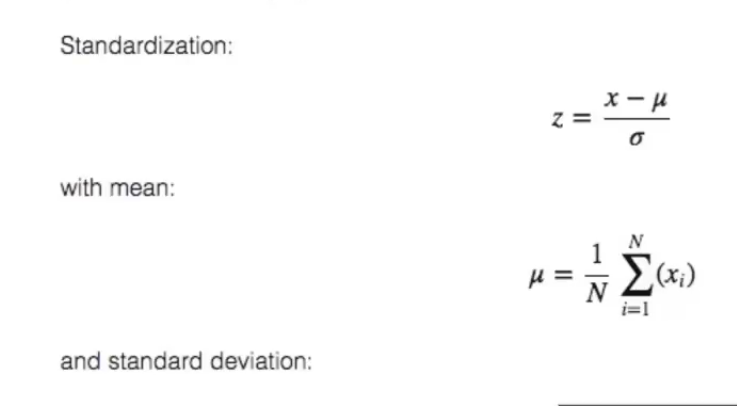

In [227]:
numeric_cols = ['age', 'bmi', 'children']
scaler = preprocessing.StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [228]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [229]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [230]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [231]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [232]:
inputs, targets = np.concatenate((scaled_inputs, categorical_data), axis=1), medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

In [233]:
rmse(targets, predictions)

6041.679651174452

In [234]:
weights_df = pd.DataFrame({'name': np.append(numeric_cols + cat_cols, 1),
                           'weight': np.append(model.coef_, model.intercept_)})

In [235]:
weights_df.sort_values('weight',ascending=False)

,name,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


### The most important features are
1. Smoker
2. Age 
3. BMI

## Creating a test set
It's a common practice to set aside a small fraction of the data e.g 10% just for testing and reporting the results of the model

In [241]:
from sklearn.model_selection import train_test_split  

In [242]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1, train_size=0.9)

In [243]:
model = LinearRegression().fit(inputs_train, targets_train)

In [244]:
predictions = model.predict(inputs_test)

In [245]:
rmse(targets_test, predictions)

4831.6649415054635

In [14]:
train_inputs = pd.read_parquet("train_inputs.parquet")

In [20]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037741,0.526244,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.037741,0.526244,SSE,0.286822,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144549,Uluru,0.556604,0.786389,0.000000,0.037741,0.526244,NE,0.193798,ENE,SW,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144550,Uluru,0.608491,0.805293,0.000000,0.037741,0.526244,ESE,0.255814,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144551,Uluru,0.674528,0.818526,0.000000,0.037741,0.526244,ESE,0.286822,ESE,SSW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
